In [2]:
options(warn=-1)
library(reshape2)
library(ggplot2)

In [19]:
git.dir='~/Dropbox/mutation_rate/20180705miseq/'
out.dir=paste0(git.dir, 'out/') 
#sample.alignments=readRDS(paste0(out.dir, 'sample.alignments.RDS'))
load(file=paste0(out.dir,'mutation.fil.Rdata'))

In [20]:
mutation.fil

$L1
$L1$`L1:1:chrV:33170:33449`
          [,1]        [,2]        [,3]        [,4]        [,5]       
id_vec    "33345_T_C" "33313_T_A" "33345_T_A" "33355_T_C" "33416_T_C"
count_vec "8756"      "169"       "169"       "147"       "88"       
          [,6]        [,7]        [,8]        [,9]        [,10]      
id_vec    "33214_-_T" "33345_-_T" "33206_-_G" "33207_-_G" "33208_-_G"
count_vec "64"        "121"       "58"        "58"        "58"       
          [,11]       [,12]       [,13]       [,14]       [,15]      
id_vec    "33226_-_T" "33253_-_C" "33345_-_C" "33326_A_C" "33345_A_C"
count_vec "57"        "41"        "41"        "39"        "39"       
          [,16]       [,17]       [,18]       [,19]       [,20]      
id_vec    "33193_C_T" "33194_A_G" "33205_G_A" "33194_C_G" "33345_C_G"
count_vec "34"        "30"        "25"        "24"        "24"       

$L1$`L1:2:chrV:32912:33189`
          [,1]        [,2]        [,3]        [,4]        [,5]       
id_vec    "33003_C_A" "32946_T_C" "33003_T_C" "33090_C_A" "33091_C_A"
count_vec "4156"      "148"       "148"       "136"       "136"      
          [,6]        [,7]        [,8]        [,9]        [,10]      
id_vec    "32960_G_C" "33003_G_C" "33112_C_A" "33117_C_A" "32933_-_T"
count_vec "117"       "117"       "98"        "98"        "88"       
          [,11]       [,12]       [,13]       [,14]       [,15]      
id_vec    "33003_-_T" "33034_C_A" "33019_C_A" "32993_A_T" "33003_A_T"
count_vec "88"        "59"        "52"        "46"        "46"       
          [,16]      
id_vec    "33044_C_A"
count_vec "30"       

$L1$`L1:3:chrV:32664:32931`
          [,1]        [,2]        [,3]        [,4]        [,5]       
id_vec    "32883_T_C" "32782_T_C" "32795_A_C" "32843_-_A" "32877_C_G"
count_vec "349"       "231"       "163"       "130"       "107"      
          [,6]        [,7]        [,8]        [,9]        [,10]      
id_vec    "32799_T_G" "32693_A_C" "32727_-_A" "32842_T_C" "32718_T_A"
count_vec "89"        "71"        "69"        "57"        "54"       
          [,11]       [,12]       [,13]       [,14]       [,15]      
id_vec    "32891_A_G" "32735_G_A" "32798_T_C" "32708_-_C" "32850_C_A"
count_vec "53"        "53"        "48"        "45"        "39"       
          [,16]       [,17]       [,18]       [,19]       [,20]      
id_vec    "32776_A_G" "32777_A_G" "32789_T_C" "32706_-_A" "32877_T_G"
count_vec "36"        "36"        "35"        "33"        "30"       
          [,21]       [,22]       [,23]      
id_vec    "32810_A_C" "32765_-_C" "32900_A_G"
count_vec "28"        "24"        "22"       

$L1$`L1:4:chrV:32510:32722`
          [,1]        [,2]        [,3]        [,4]        [,5]       
id_vec    "32558_G_C" "32661_T_C" "32572_G_C" "32679_T_C" "32572_T_C"
count_vec "352"       "235"       "223"       "180"       "162"      
          [,6]        [,7]        [,8]        [,9]        [,10]      
id_vec    "32638_-_T" "32693_A_C" "32574_A_T" "32610_T_C" "32680_T_C"
count_vec "144"       "134"       "130"       "111"       "99"       
          [,11]       [,12]       [,13]       [,14]       [,15]      
id_vec    "32662_T_C" "32577_-_A" "32695_C_A" "32567_A_C" "32572_A_C"
count_vec "63"        "60"        "54"        "48"        "48"       
          [,16]       [,17]       [,18]       [,19]       [,20]      
id_vec    "32632_-_T" "32537_-_C" "32606_-_A" "32608_-_A" "32576_T_G"
count_vec "40"        "33"        "33"        "33"        "26"       
          [,21]       [,22]       [,23]       [,24]       [,25]      
id_vec    "32625_-_C" "32630_A_C" "32667_C_A" "32539_T_G" "32567_T_C"
count_vec "25"        "25"        "24"        "24"        "23"       
          [,26]       [,27]      
id_vec    "32706_-_A" "32573_T_C"
count_vec "21"        "21"       

$L1$`L1:6:chrV:32019:32308`
          [,1]        [,2]        [,3]        [,4]        [,5]       
id_vec    "32076_T_C" "32282_-_C" "32254_T_G" "32275_T_G" "32059_C_G"
count_vec "215"       "185"       "173"       

In [8]:
#function
get_replicated_type  =function(s1, s2)
{
  S1 = unlist(mutation.fil[[s1]])
  S1 = S1[seq(1, length(S1),2)]
  S1_rep = unlist(mutation.fil[[s2]])
  S1_rep = S1_rep[seq(1, length(S1_rep),2)]
  S1_common = intersect(S1, S1_rep)
  #S1_common = union(S1, S1_rep)
  
  all_types = unique(
    unlist(lapply(S1_common, function(x) paste0(strsplit(x,"_")[[1]][2:3],collapse="_")
    )
    ))
  all_types = gsub("-", "N", all_types)
  return(list(this_type=all_types, S_common=S1_common))
}

expand_count = function(ID, S_common, count_mat)
{
this_vec = NULL
this_vec$ID = ID
for(j in 2:ncol(count_mat))
  this_vec[[colnames(count_mat)[j]]] = 0

for(i in 1:length(S_common))
{
  this_type = paste0(strsplit(S_common[i],"_")[[1]][2:3], collapse="_")
  this_type = gsub("-", "N", this_type)
  if(length(this_vec[[this_type]])<1)
  {
    this_vec[[this_type]]=1
  } else {
    this_vec[[this_type]] = this_vec[[this_type]] + 1
  }
}

count_mat =rbind.data.frame(count_mat, this_vec, stringsAsFactors=F)
return(count_mat)
}                   

In [14]:
all_types = unlist(mutation.fil)
all_types = all_types[seq(1,length(all_types),2)]
all_types = unique(
  unlist(lapply(all_types, function(x) paste0(strsplit(x,"_")[[1]][2:3],collapse="_")
  )
  ))
all_types = gsub("-", "N", all_types)

count_mat = matrix(nrow=0, ncol=length(all_types)+1)
colnames(count_mat) = c('ID', all_types)
count_mat = as.data.frame(count_mat, stringsAsFactors=F)


In [26]:
count_mat

ID,T_C,T_A,N_T,N_G,N_C,A_C,C_T,A_G,G_A,C_G,C_A,G_C,A_T,N_A,T_G,G_T
S1,22,3,7,3,8,11,6,8,6,5,11,6,3,7,11,0
S2,21,3,8,8,16,11,13,9,6,9,16,5,7,13,18,5
S3,15,3,0,1,3,9,1,5,7,15,19,5,1,25,11,7
S4,21,4,5,7,8,14,5,9,8,2,15,3,6,8,11,5


In [27]:
rowSums(count_mat[2:ncol(count_mat)])

1   2   3   4 
117 168 127 131

In [21]:
#the code is for replicates, here I did not have replicates, so 
#just rep the mutation.fil to make it compatible for rest codes
mutation.fil = rep(mutation.fil, each = 2)
replicate_mat = matrix(names(mutation.fil), ncol=2, byrow = T)
rownames(replicate_mat) = c('S1', 'S2', 'S3', 'S4')
for(i in 1:nrow(replicate_mat))
{
  this_id = rownames(replicate_mat)[i]
  this = get_replicated_type(replicate_mat[i,1], replicate_mat[i,2])
  count_mat = expand_count(this_id, this$S_common, count_mat)
}


Using ID as id variables


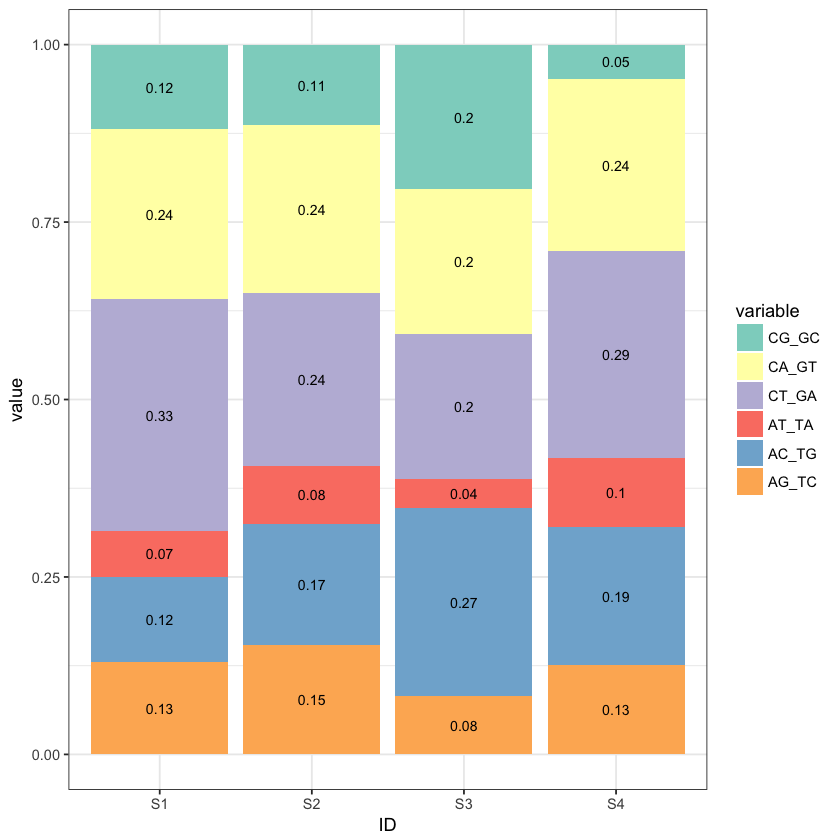

In [25]:
#calculate the percentage (ID column cannot be added as numeric)
sam_sum=apply(count_mat[,2:ncol(count_mat)], 1, sum)
count_mat2 = count_mat[,2:ncol(count_mat)]/sam_sum
count_mat2=cbind(ID=count_mat$ID, count_mat2)

count_mat2=count_mat2[,selected_mutation_type]
###mutation.fil is pos-seq-ref  need to reverse the *_* order
type=names(count_mat2)
type_change=type
type_change[2:length(type)]=sapply(type[2:length(type)],function(x) paste(strsplit(x,'_')[[1]][2],strsplit(x,'_')[[1]][1],sep ="_"))

names(count_mat2)=type_change

#combine two types into one
count_mat3=data.frame(ID=count_mat$ID,
                      CG_GC = count_mat2$C_G+count_mat2$G_C,
                      CA_GT = count_mat2$C_A+count_mat2$G_T,
                      CT_GA = count_mat2$C_T+count_mat2$G_A,
                      AT_TA = count_mat2$A_T+count_mat2$T_A,
                      AC_TG = count_mat2$A_C+count_mat2$T_G,
                      AG_TC = count_mat2$A_G+count_mat2$T_C
                      )
#count_mat3 = cbind(count_mat3, CG_GC = count_mat2$C_G+count_mat2$G_C)


normmat3 = count_mat3[2:7]/rowSums(count_mat3[2:7])
normmat3$ID = count_mat3$ID

selected_mutation_type = grep("N", colnames(normmat3), invert=T)
df = melt(normmat3[,selected_mutation_type])
p=ggplot(data=df, aes(x=ID, y=value, fill=variable)) + geom_bar(stat="identity", position="stack") +
  scale_fill_brewer(palette = "Set3") + 
  geom_text(aes(label=round(value,2)), size =3, position = position_stack(vjust = 0.5)) +
  theme_bw()
print(p)
